1. Get Spotify Top 200 daily by location and by date

    1.1 Weekly Data handling

countries = ['ca','dk', 'gr', 'is', 'mx', 'ph', 'sv', 'ar', 'ch', 'do', 'gt', 'it', 'my', 'pl', 'th', 'at', 'cl', 'ec', 'hk', 'jp', 'ni', 'pt', 'tr','au', 'co', 'ee', 'hn', 'lt', 'nl', 'py', 'tw',
'be', 'cr', 'es', 'hu','lu', 'no', 'ro', 'us','bg', 'cy', 'fi', 'id', 'lv', 'nz', 'se', 'uy', 'bo', 'cz', 'fr', 'ie', 'mc', 'pa', 'sg', 'vn','br', 'de', 'gb', 'il', 'mt', 'pe', 'sk', 'global']


In [ ]:
# All available countries' weekly data
# Don't run this code block as the top200 weekly files already exist; Otherwise, it will be overwritten

from fycharts import SpotifyCharts 
import os

countries = ['ca','dk', 'gr', 'is', 'mx', 'ph', 'sv', 'ar', 'ch', 'do', 'gt', 'it', 'my', 'pl', 'th', 'at', 'cl', 'ec', 'hk', 'jp', 'ni', 'pt', 'tr','au', 'co', 'ee', 'hn', 'lt', 'nl', 'py', 'tw',
'be', 'cr', 'es', 'hu','lu', 'no', 'ro', 'us','bg', 'cy', 'fi', 'id', 'lv', 'nz', 'se', 'uy', 'bo', 'cz', 'fr', 'ie', 'mc', 'pa', 'sg', 'vn','br', 'de', 'gb', 'il', 'mt', 'pe', 'sk', 'global']

for country in countries:
    file_path = "top_200_weekly/{}.csv".format(country)
    if os.path.exists(file_path):
        os.remove(file_path) 
    api = SpotifyCharts.SpotifyCharts()
    api.top200Weekly(output_file = file_path, start = '2018-09-21', end = '2019-09-27',region=country)
    print("{} is done".format(country))



2. read top_200_weekly file 
get the track
get audio features of each track

In [1]:
# Similarity Analysis with global Top 200
def jaccard_similarity(x, y):
    intersection_cardinality = len(set.intersection(*[set(x), set(y)]))
    union_cardinality = len(set.union(*[set(x),set(y)]))
    return intersection_cardinality/ float(union_cardinality)

# Global Top 200 weekly data
base_file_name = 'top_200_weekly/global.csv'
data = pd.read_csv(base_file_name, header = 0)
data.head()
base_top200_dataframe = pd.DataFrame(data)


# new data frame with split value columns
new = top200_dataframe["date"].str.split("--", n=1, expand=True)

# making separate first name column from new data frame
top200_dataframe["date_from"] = new[0]

# making separate last name column from new data frame
top200_dataframe["date_to"] = new[1]

top200_dataframe['date_from'] = pd.to_datetime(top200_dataframe['date_from'], format="%Y-%m-%d")
top200_dataframe['date_to'] = pd.to_datetime(top200_dataframe['date_to'], format="%Y-%m-%d")


jaccard_similarity(top200_dataframe['id'], base_top200_dataframe['id'])


In [3]:
import pandas as pd

countries = ['ca','dk', 'gr', 'is', 'mx', 'ph', 'sv', 'ar', 'ch', 'do', 'gt', 'it', 'my', 'pl', 'th', 'at', 'cl', 'ec', 'hk', 'jp', 'ni', 'pt', 'tr','au', 'co', 'ee', 'hn', 'lt', 'nl', 'py', 'tw',
'be', 'cr', 'es', 'hu','lu', 'no', 'ro', 'us','bg', 'cy', 'fi', 'id', 'lv', 'nz', 'se', 'uy', 'bo', 'cz', 'fr', 'ie', 'pa', 'sg', 'vn','br', 'de', 'gb', 'il', 'mt', 'pe', 'sk', 'global']


def read_country(country):
    base_file_name = 'top_200_weekly/{}.csv'.format(country)
    data = pd.read_csv(base_file_name, header = 0)
    return pd.DataFrame(data)
    
similarities = pd.DataFrame()
for country_a in countries:
    country_a_top = read_country(country_a)
    for country_b in countries:
        country_b_top = read_country(country_b)
        similarity = jaccard_similarity(country_a_top['id'], country_b_top['id'])
        similarities = similarities.append({'country_a': country_a, 'country_b': country_b, 'similarity': similarity}, ignore_index=True)

similarities
export_csv = similarities.to_csv(r'similarities_among_countries.csv')


        

In [4]:
# Country's dictionary 
# in = India
# za = South Africa

dictionary = {'global':'Global', 'us':'United States', 'gb': 'United Kingdom', 'ad': 'Andorra', 'ar': 'Argentina', 'at': 'Austria', 'au': 'Australia', 'be': 'Belgium', 'bg': 'Bulgaria', 'bo': 'Bolivia', 'br': 'Brazil', 'ca': 'Canada', 'ch': 'Switzerland', 'cl': 'Chile', 'co': 'Colombia', 'cr': 'Costa Rica', 'cy': 'Cyprus', 'cz': 'Czech Republic', 'de': 'Germany', 'dk': 'Denmark', 'do': 'Dominican Republic', 'ec': 'Ecuador', 'ee': 'Estonia', 'es': 'Spain', 'fi': 'Finland', 'fr': 'France', 'gr': 'Greece', 'gt': 'Guatemala', 'hk': 'Hong Kong', 'hn': 'Honduras', 'hu': 'Hungary', 'id': 'Indonesia', 'ie': 'Ireland', 'il' : 'Israel', 'in': 'India', 'is': 'Iceland', 'it': 'Italy', 'jp': 'Japan', 'lt': 'Lithuania', 'lu': 'Luxembourg', 'lv': 'Latvia', 'mc': 'Monaco', 'mt': 'Malta', 'mx': 'Mexico', 'my': 'Malaysia', 'ni': 'Nicaragua', 'nl': 'Netherlands', 'no': 'Norway', 'nz': 'New Zealand', 'pa': 'Panama', 'pe': 'Peru', 'ph': 'Philippines', 'pl': 'Poland', 'pt': 'Portugal', 'py': 'Paraguay', 'ro': 'Romania', 'se': 'Sweden', 'sg': 'Singapore', 'sk': 'Slovakia', 'sv': 'El Salvador', 'th': 'Thailand', 'tr': 'Turkey', 'tw': 'Taiwan', 'uy': 'Uruguay', 'vn': 'Vietnam', 'za': 'South Africa'}


In [6]:
import pandas as pd
file_name = 'similarities_among_countries.csv'
data = pd.read_csv(file_name, header = 0)
data.head()
similarities = pd.DataFrame(data)


similarities['country_a_name'] = similarities['country_a'].map(dictionary)

similarities['country_b_name'] = similarities['country_b'].map(dictionary)
#similarities


In [7]:
export_csv = similarities.to_csv(r'similarities_among_countries_final.csv')

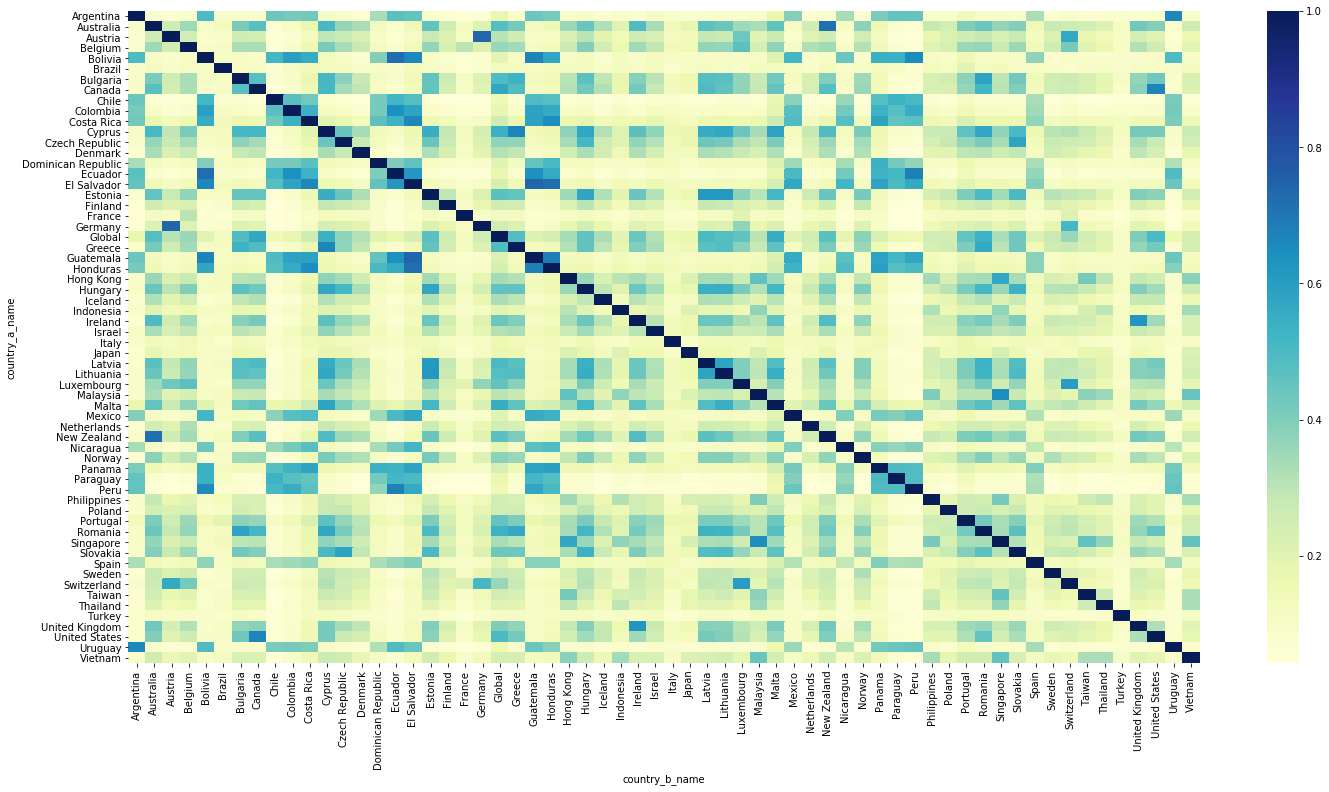

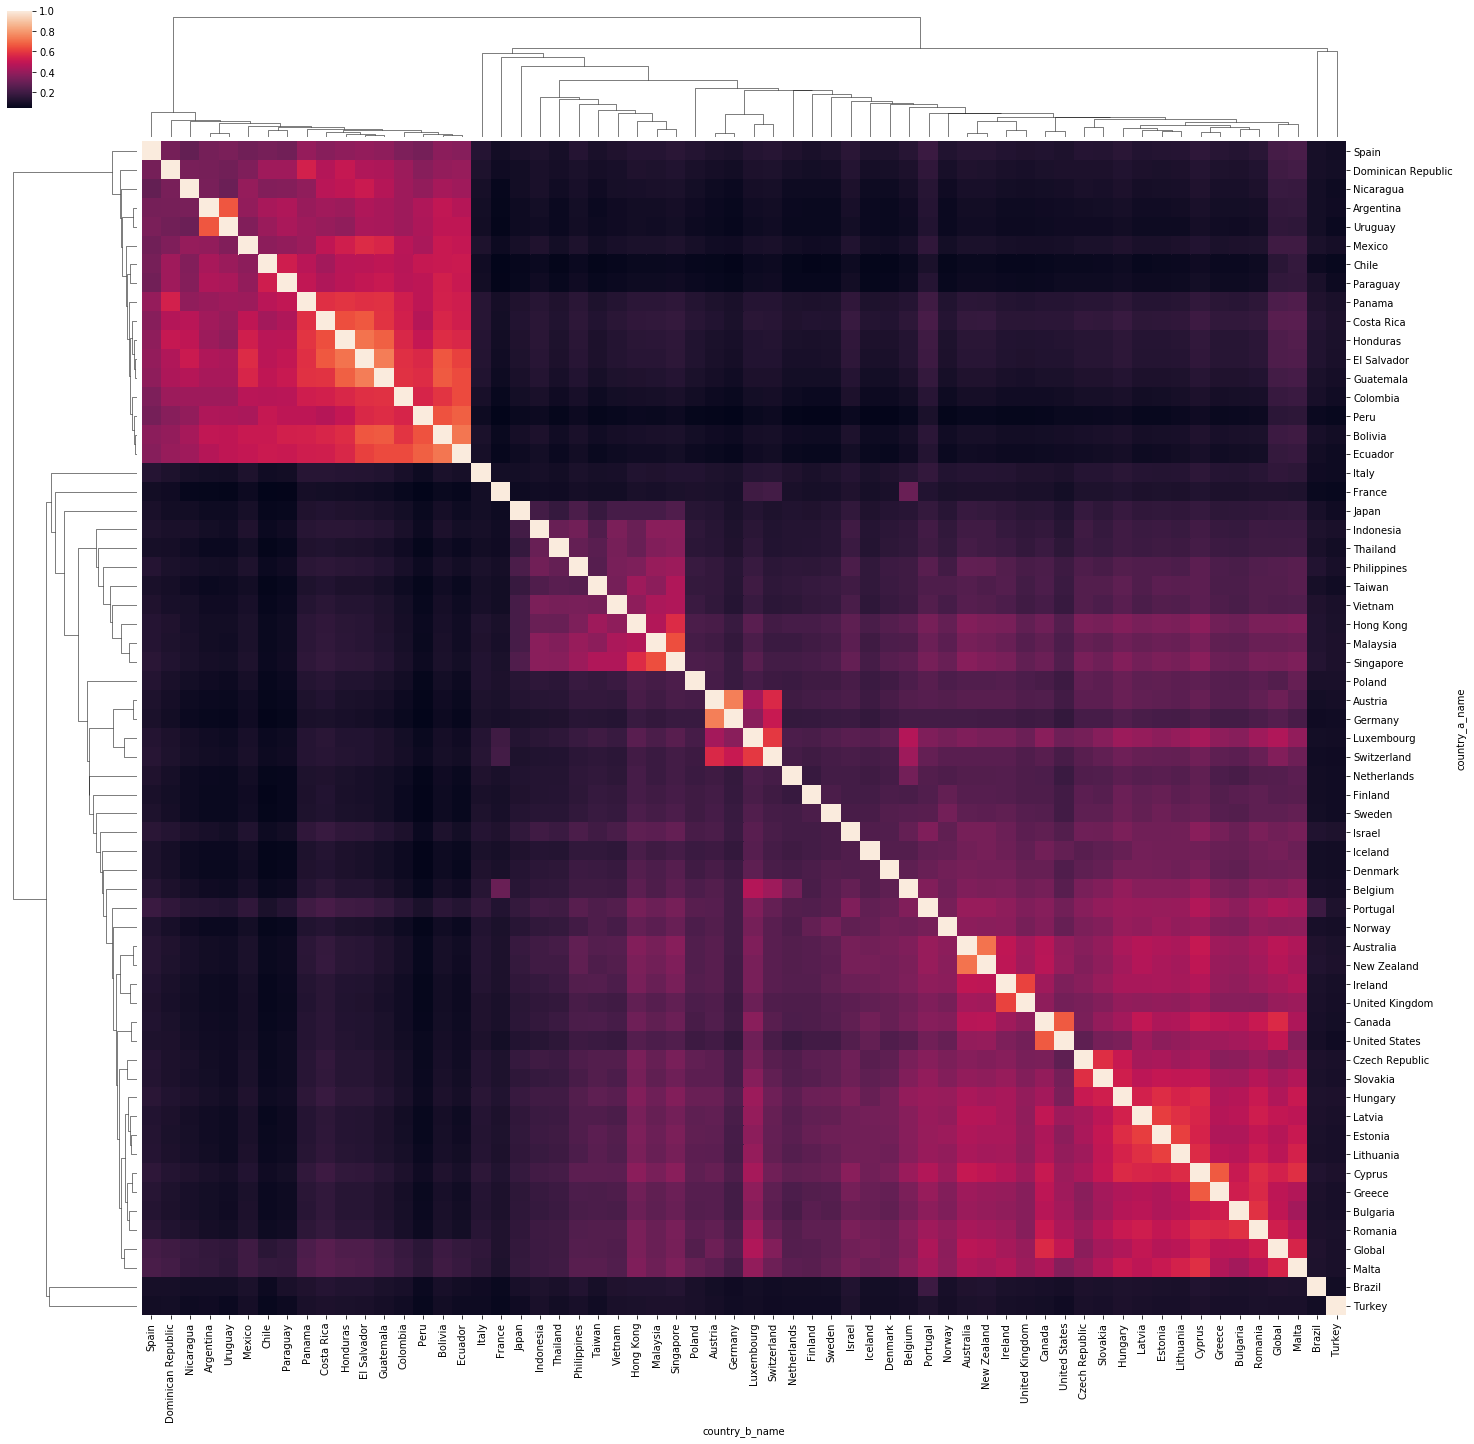

In [9]:
# create a heatmap

import seaborn as sns
import matplotlib.pyplot as plt
heatmap1_data = pd.pivot_table(similarities, values='similarity', 
                     index='country_a_name', 
                     columns='country_b_name')
plt.figure(figsize=(24, 12))
sns.heatmap(heatmap1_data, cmap="YlGnBu")

sns.clustermap(heatmap1_data, metric="correlation", figsize=(24, 24))

In [ ]:
# Use Chunk method to split the data
# Don't run this code block as the audio features files already exist; Otherwise, it will be overwritten

import spotipy
import spotipy.util as util

scope = 'user-library-read'
token = util.prompt_for_user_token('username', scope, client_id='your client id',
                                   client_secret='your client secret', redirect_uri='http://localhost/')

countries = ['ca','dk', 'gr', 'is', 'mx', 'ph', 'sv', 'ar', 'ch', 'do', 'gt', 'it', 'my', 'pl', 'th', 'at', 'cl', 'ec', 'hk', 'jp', 'ni', 'pt', 'tr','au', 'co', 'ee', 'hn', 'lt', 'nl', 'py', 'tw',
'be', 'cr', 'es', 'hu','lu', 'no', 'ro', 'us','bg', 'cy', 'fi', 'id', 'lv', 'nz', 'se', 'uy', 'bo', 'cz', 'fr', 'ie', 'pa', 'sg', 'vn','br', 'de', 'gb', 'il', 'mt', 'pe', 'sk', 'global']

def read_country(country):
    file_name = 'top_200_weekly/{}.csv'.format(country)
    data = pd.read_csv(file_name, header = 0)
    return pd.DataFrame(data)

    
def get_audio_features(top200_dataframe, country):
    features_dataframe = pd.DataFrame()
    top200_dataframe_id = top200_dataframe[['id']].drop_duplicates()

    def top200_chunker(iterable, size):
        for i in range(0, len(iterable), size):
            yield iterable.loc[iterable.index[i:i + size], 'id']


    for id_chunk in top200_chunker(top200_dataframe_id, 50):

        spotify = spotipy.Spotify(auth=token)
        results = spotify.audio_features(id_chunk)

        for result in results:
            features_dataframe = features_dataframe.append(result, ignore_index=True)

        features_dataframe = features_dataframe.drop_duplicates()
        features_dataframe_valence = features_dataframe[['id', 'valence', 'energy', 'loudness']]
        #features_dataframe_valence

        merged = top200_dataframe.merge(features_dataframe_valence, left_on = 'id', right_on = 'id', how='left')
        #merged

        export_csv = merged.to_csv(r'audio_features/audio_features_{}.csv'.format(country))
    
for country in countries:
    country_top200 = read_country(country)
    # new data frame with split value columns
    new = country_top200["date"].str.split("--", n=1, expand=True)

    # making separate first name column from new data frame
    country_top200["date_from"] = new[0]

    # making separate last name column from new data frame
    country_top200["date_to"] = new[1]

    country_top200['date_from'] = pd.to_datetime(top200_dataframe['date_from'], format="%Y-%m-%d")
    country_top200['date_to'] = pd.to_datetime(top200_dataframe['date_to'], format="%Y-%m-%d")
    country_top200.drop(columns =["date"], inplace = True)
   
    get_audio_features(country_top200, country)

    


In [ ]:
#Combine all countries' audio features files
# Don't run this code block as the audio features full list file already exists; Otherwise, it will be overwritten

import glob

all_files = glob.glob('audio_features/*.csv')

df = pd.concat([pd.read_csv(data) for data in all_files], ignore_index = True)
df.rename(columns={"date_from": "date"}, inplace = True)
df['region'] = df['region'].map(dictionary)
df = df.drop(df.columns[0], axis=1) # drop index column

export_csv = df.to_csv(r'audio_features_full_list.csv')
